In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
from scipy.ndimage import median_filter
import glob
from windrose import WindroseAxes
import cmcrameri as cmc
from cmcrameri import cm
from scipy.stats import linregress
import sys
import os

# Add parent directory's src to path for package imports
parent_dir = os.path.dirname(os.getcwd())
src_path = os.path.join(parent_dir, 'src')
if src_path not in sys.path:
    sys.path.insert(0, src_path)

# Import modules from the installed package
from ec import (
    constants,
    func_read_data,
    func_despike_data,
    sensor_info,
    func_dr,
    func_mrfd,
)
from mo import func_mo
from spc import normalize
from plotting import funcs_plots

# For development: auto-reload modules
%load_ext autoreload
%autoreload 2

# Import all functions into namespace (for convenience)
from ec import *
from mo import *
from spc import *
from plotting import *

print("✓ All imports successful!")

✓ All imports successful!


Using 2024 calibration coefficients
{'A': 4820.04, 'B': 3792900.0, 'C': -115477000.0, 'H2O_Zero': 0.7087, 'H20_Span': 0.9885}
Reading data from /home/engbers/Documents/PhD/EC_data_convert/converted/20240118_SFC
TOA5_STN1OneMin_403_2023_12_31_1506.dat
Extracted number: 403
TOA5_STN1OneMin_404_2024_01_01_1506.dat
Extracted number: 404
TOA5_STN1OneMin_405_2024_01_02_1506.dat
Extracted number: 405
TOA5_STN1OneMin_406_2024_01_03_1506.dat
Extracted number: 406
TOA5_STN1OneMin_407_2024_01_04_1506.dat
Extracted number: 407
TOA5_STN1OneMin_408_2024_01_05_1506.dat
Extracted number: 408
TOA5_STN1OneMin_409_2024_01_06_1506.dat
Extracted number: 409
TOA5_STN1OneMin_410_2024_01_07_1506.dat
Extracted number: 410
TOA5_STN1OneMin_411_2024_01_08_1506.dat
Extracted number: 411
TOA5_STN1OneMin_412_2024_01_09_1506.dat
Extracted number: 412
TOA5_STN1OneMin_413_2024_01_10_1506.dat
Extracted number: 413
TOA5_STN1OneMin_414_2024_01_11_1506.dat
Extracted number: 414
TOA5_STN1OneMin_415_2024_01_12_1506.dat
Extra

/home/engbers/Documents/Github/DataProcessingScripts/Func_read_data.py:287: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f'./plots/{sensor}_{start}_slowdata.png', bbox_inches='tight')


(<Figure size 1300x1400 with 7 Axes>,
 array([<Axes: ylabel='Temperature [oC]'>, <Axes: ylabel='RH wrt ice [%]'>,
        <Axes: ylabel='Wind Direction'>, <Axes: ylabel='Wind Speed[ms-1]'>,
        <Axes: ylabel='Net Radiation [Wm-2]'>,
        <Axes: ylabel='Net Radiation [Wm-2]'>,
        <Axes: ylabel='Flowcapt [g/m2/s]'>], dtype=object))

/home/engbers/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


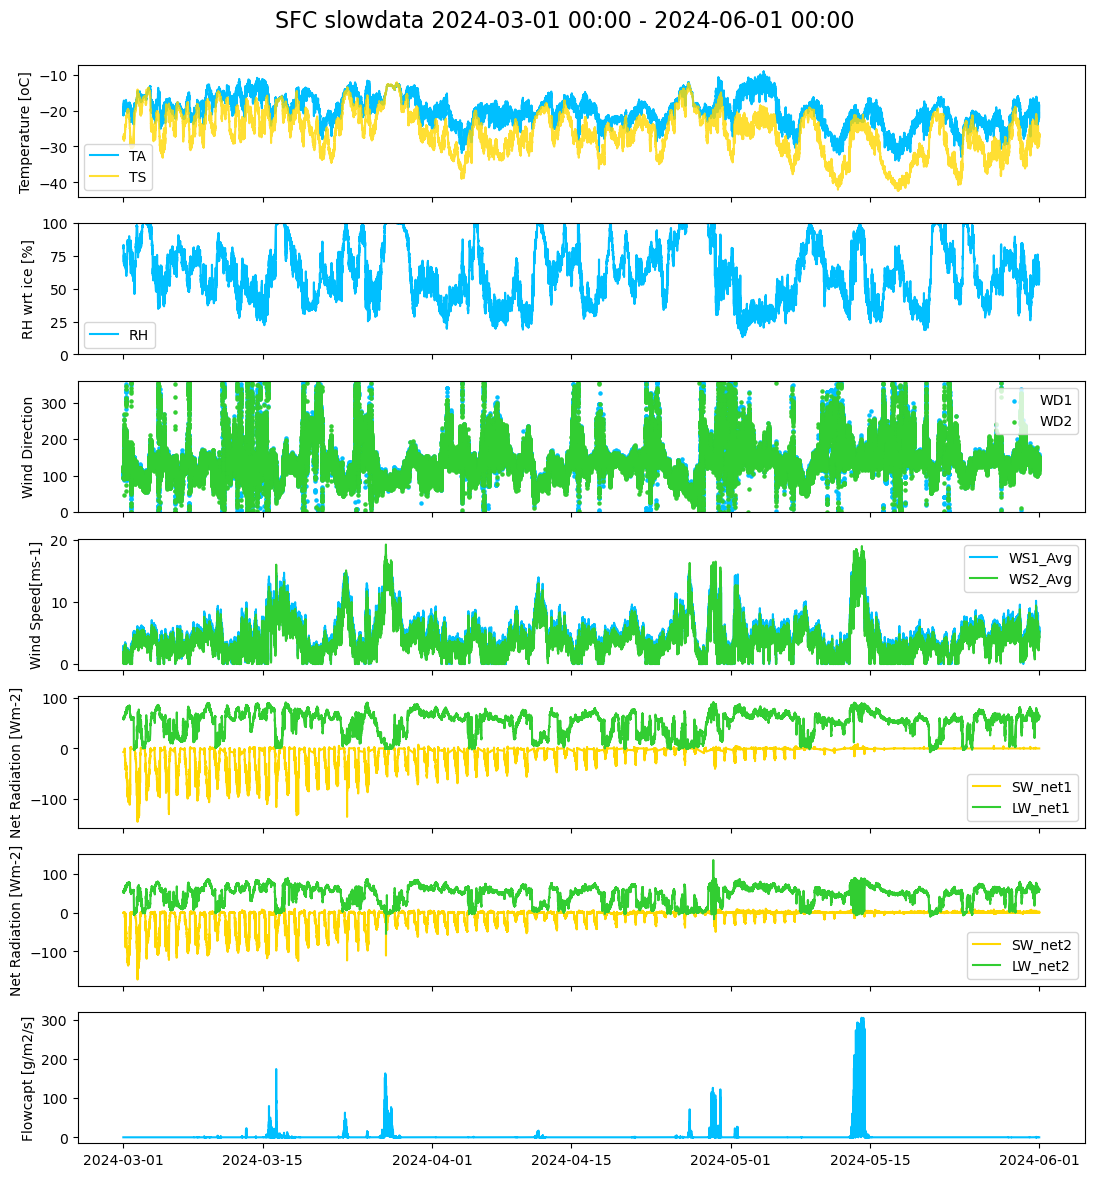

In [2]:
""""READ IN SLOWDATA SFC"""

folder='/home/engbers/Documents/PhD/EC_data_convert/converted/'
sensor='SFC'
start='2024-03-01 00:00'
end='2024-06-01 00:00'

"""GET SENSOR INFO"""
plim, calibration_coefficients, heights = get_sensor_info(sensor, 2024)

"""READ FAST AND SLOW DATA from folder"""
slowdata=read_data(folder, 'slow', sensor, start, end, plot_data=False)

"""CLEAN SLOWDATA"""
slowdata_cleaned=clean_slowdata(slowdata)
plot_SFC_slowdata(slowdata_cleaned, sensor, start, end)

In [7]:
"""READ IN EDDYPRO FILES"""
folder='/home/engbers/Documents/PhD/EC_data_convert/'

sensor='SFC_DR'
fluxes_SFC = read_eddypro_data(folder, sensor)
fluxes_SFC_qc = read_eddypro_data(folder, sensor, qc=True)
sensor='CSAT_16m_DR'
fluxes_16m = read_eddypro_data(folder, sensor)
fluxes_16m_qc = read_eddypro_data(folder, sensor, qc=True)
sensor='CSAT_26m'
fluxes_26m_qc = read_eddypro_data(folder, sensor, qc=True)
fluxes_26m = read_eddypro_data(folder, sensor)

Files found: ['/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202405/eddypro_May2024_full_output_2025-05-22T145422_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202408/eddypro_Aug2024_full_output_2025-05-23T090214_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202412/eddypro_Dec2024_full_output_2025-05-23T123929_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202407/eddypro_Jul2024_full_output_2025-05-22T164622_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202401/eddypro_SFC_Jan2024_full_output_2025-05-21T184431_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202404/eddypro_Apr2024_full_output_2025-05-22T135551_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202409/eddypro_Sep2024_full_output_2025-05-23T102118_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/20241

/home/engbers/Documents/Github/DataProcessingScripts/Func_read_data.py:425: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  [pd.read_csv(file, header=1) for file in files],
/home/engbers/Documents/Github/DataProcessingScripts/Func_read_data.py:425: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  [pd.read_csv(file, header=1) for file in files],
/home/engbers/Documents/Github/DataProcessingScripts/F

Files found: ['/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202405/eddypro_May2024_qc_details_2025-05-22T145422_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202408/eddypro_Aug2024_qc_details_2025-05-23T090214_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202412/eddypro_Dec2024_qc_details_2025-05-23T123929_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202407/eddypro_Jul2024_qc_details_2025-05-22T164622_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202401/eddypro_SFC_Jan2024_qc_details_2025-05-21T184431_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202404/eddypro_Apr2024_qc_details_2025-05-22T135551_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202409/eddypro_Sep2024_qc_details_2025-05-23T102118_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202411/eddyp

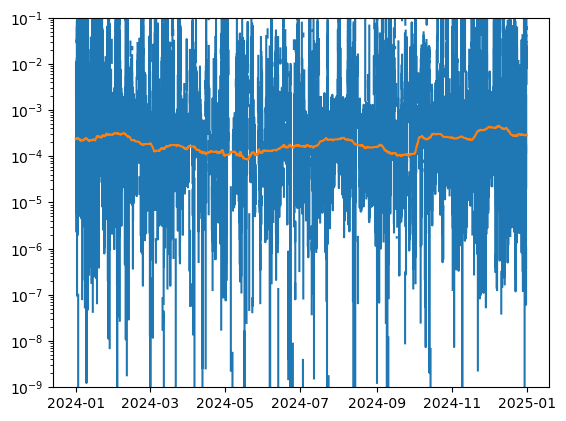

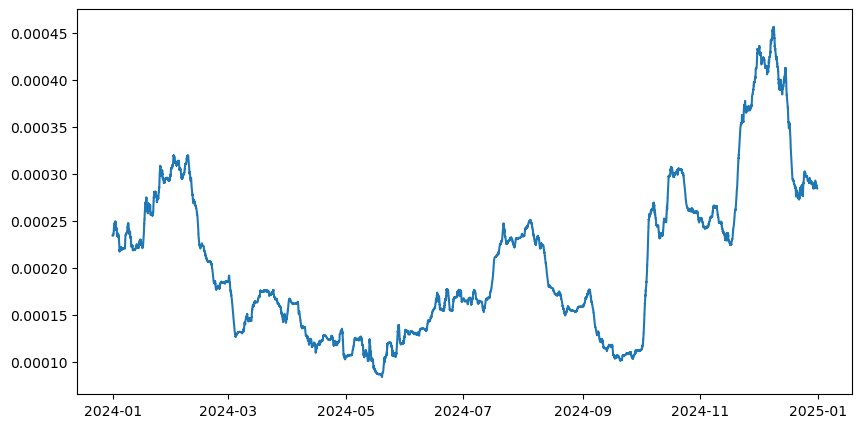

In [12]:
z0, z0rolling=compute_roughness_length(fluxes_SFC, fluxes_SFC_qc, 1.5)
plt.plot(z0)
plt.plot(z0rolling, label='z0 rolling median')
plt.yscale('log')
plt.ylim(1e-9, 1e-1)
plt.figure(figsize=(10, 5))
plt.plot(z0rolling, label='z0 rolling median')

In [14]:
z0rolling.resample('10min').mean()

datetime
2024-01-01 00:00:00    0.000235
2024-01-01 00:10:00    0.000235
2024-01-01 00:20:00    0.000235
2024-01-01 00:30:00    0.000235
2024-01-01 00:40:00    0.000235
                         ...   
2024-12-31 14:10:00    0.000285
2024-12-31 14:20:00    0.000285
2024-12-31 14:30:00    0.000285
2024-12-31 14:40:00    0.000285
2024-12-31 14:50:00    0.000285
Freq: 10min, Length: 52650, dtype: float64